# Problem

# To predict the price of vehicle

In [46]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score,recall_score, f1_score
from sklearn.metrics import plot_confusion_matrix,roc_curve
from sklearn.tree import DecisionTreeRegressor,plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier  

from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler

import plotly.express as px
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

import pickle
import json


import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Data Gathering 

In [47]:
df=pd.read_csv(r'E:\Data_sets\vehicleset2\project_data\ElectricCarData_Clean.csv')
df

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,Nissan,Ariya 63kWh,7.5,160,330,191,440,Yes,FWD,Type 2 CCS,Hatchback,C,5,45000
820,Audi,e-tron S Sportback 55 quattro,4.5,210,335,258,540,Yes,AWD,Type 2 CCS,SUV,E,5,96050
821,Nissan,Ariya e-4ORCE 63kWh,5.9,200,325,194,440,Yes,AWD,Type 2 CCS,Hatchback,C,5,50000
822,Nissan,Ariya e-4ORCE 87kWh Performance,5.1,200,375,232,450,Yes,AWD,Type 2 CCS,Hatchback,C,5,65000


# EDA

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            824 non-null    object 
 1   Model            824 non-null    object 
 2   AccelSec         824 non-null    float64
 3   TopSpeed_KmH     824 non-null    int64  
 4   Range_Km         824 non-null    int64  
 5   Efficiency_WhKm  824 non-null    int64  
 6   FastCharge_KmH   824 non-null    object 
 7   RapidCharge      824 non-null    object 
 8   PowerTrain       824 non-null    object 
 9   PlugType         824 non-null    object 
 10  BodyStyle        824 non-null    object 
 11  Segment          824 non-null    object 
 12  Seats            824 non-null    int64  
 13  PriceEuro        824 non-null    int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 90.2+ KB


In [49]:
df.isna().sum()

Brand              0
Model              0
AccelSec           0
TopSpeed_KmH       0
Range_Km           0
Efficiency_WhKm    0
FastCharge_KmH     0
RapidCharge        0
PowerTrain         0
PlugType           0
BodyStyle          0
Segment            0
Seats              0
PriceEuro          0
dtype: int64

In [50]:
df.head().T

,0,1,2,3,4
Brand,Tesla,Volkswagen,Polestar,BMW,Honda
Model,Model 3 Long Range Dual Motor,ID.3 Pure,2,iX3,e
AccelSec,4.6,10.0,4.7,6.8,9.5
TopSpeed_KmH,233,160,210,180,145
Range_Km,450,270,400,360,170
Efficiency_WhKm,161,167,181,206,168
FastCharge_KmH,940,250,620,560,190
RapidCharge,Yes,Yes,Yes,Yes,Yes
PowerTrain,AWD,RWD,AWD,RWD,RWD
PlugType,Type 2 CCS,Type 2 CCS,Type 2 CCS,Type 2 CCS,Type 2 CCS


In [51]:
df.shape

(824, 14)

In [52]:
df.corr()

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,Seats,PriceEuro
AccelSec,1.000000,-0.786195,-0.677062,-0.382904,-0.175335,-0.627174
TopSpeed_KmH,-0.786195,1.000000,0.746662,0.355675,0.126470,0.829057
Range_Km,-0.677062,0.746662,1.000000,0.313077,0.300163,0.674844
Efficiency_WhKm,-0.382904,0.355675,0.313077,1.000000,0.301230,0.396705
Seats,-0.175335,0.126470,0.300163,0.301230,1.000000,0.020920
PriceEuro,-0.627174,0.829057,0.674844,0.396705,0.020920,1.000000


<AxesSubplot:>

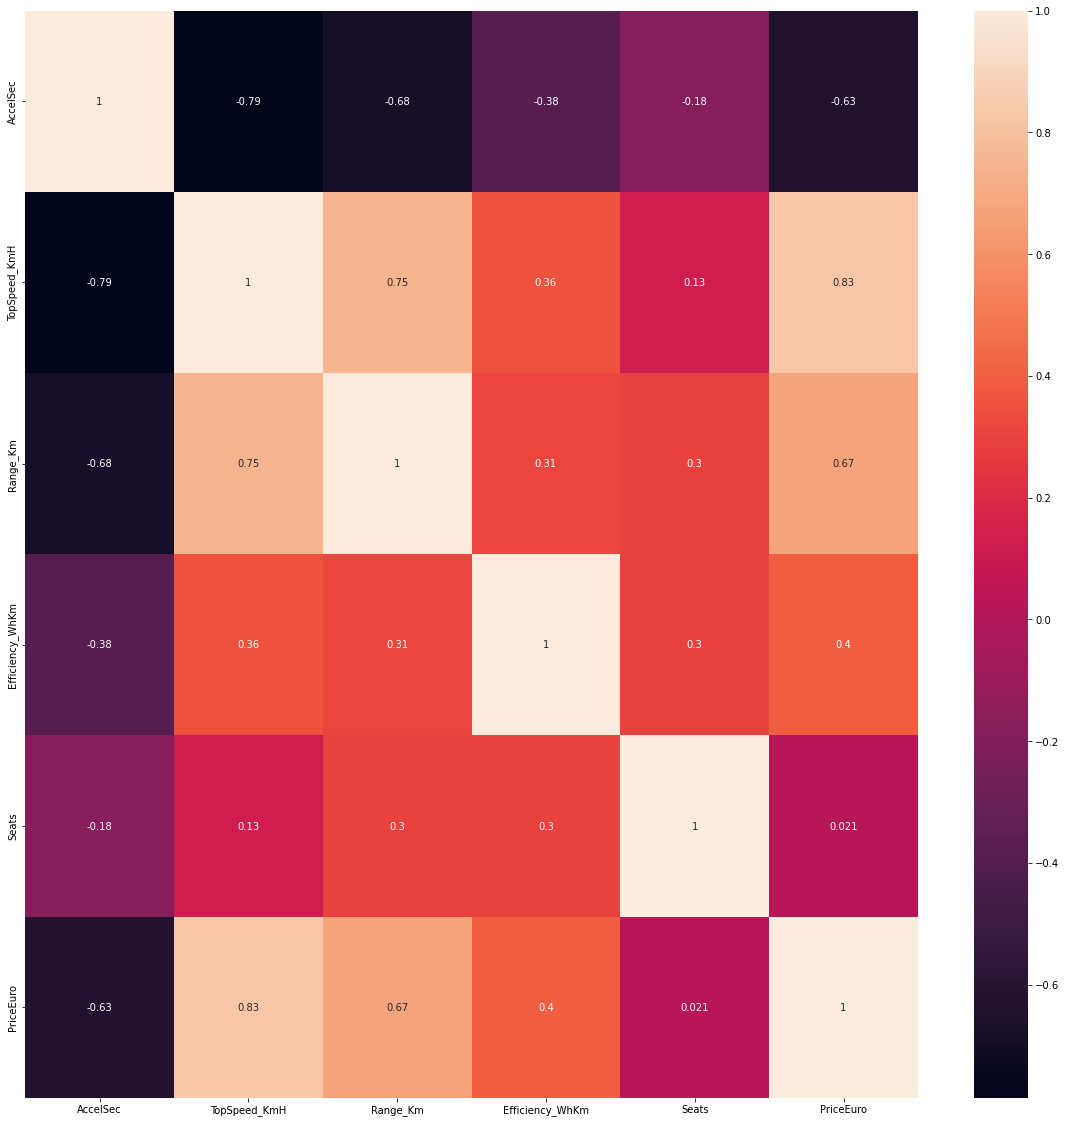

In [53]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot = True)

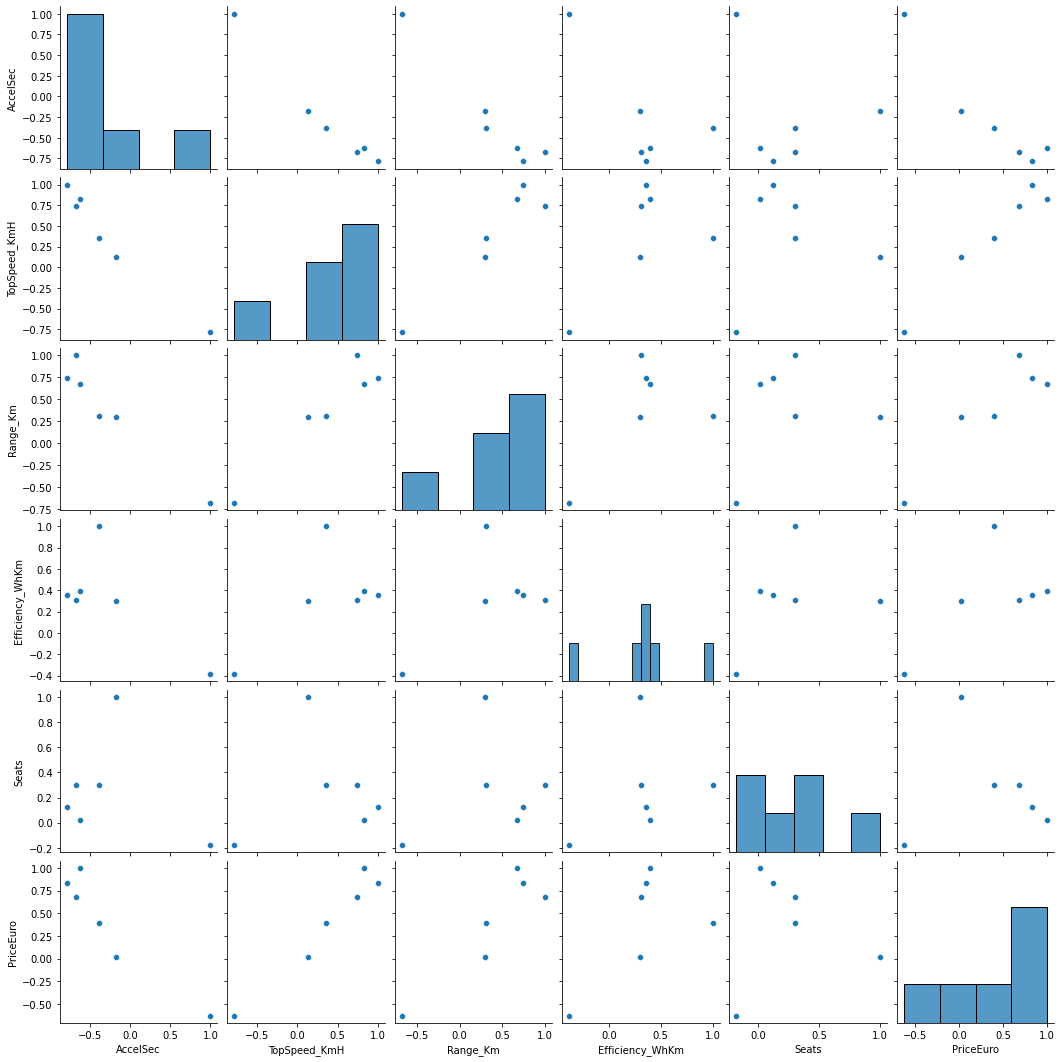

In [54]:
sns.pairplot(df.corr())


In [55]:
df.head().T

,0,1,2,3,4
Brand,Tesla,Volkswagen,Polestar,BMW,Honda
Model,Model 3 Long Range Dual Motor,ID.3 Pure,2,iX3,e
AccelSec,4.6,10.0,4.7,6.8,9.5
TopSpeed_KmH,233,160,210,180,145
Range_Km,450,270,400,360,170
Efficiency_WhKm,161,167,181,206,168
FastCharge_KmH,940,250,620,560,190
RapidCharge,Yes,Yes,Yes,Yes,Yes
PowerTrain,AWD,RWD,AWD,RWD,RWD
PlugType,Type 2 CCS,Type 2 CCS,Type 2 CCS,Type 2 CCS,Type 2 CCS


In [56]:
df.isna().sum()

Brand              0
Model              0
AccelSec           0
TopSpeed_KmH       0
Range_Km           0
Efficiency_WhKm    0
FastCharge_KmH     0
RapidCharge        0
PowerTrain         0
PlugType           0
BodyStyle          0
Segment            0
Seats              0
PriceEuro          0
dtype: int64

In [57]:
df['RapidCharge'].value_counts()

Yes    784
No      40
Name: RapidCharge, dtype: int64

In [58]:
df['RapidCharge'].replace({'Yes':1,'No':0},inplace=True)
df['RapidCharge']

0      1
1      1
2      1
3      1
4      1
      ..
819    1
820    1
821    1
822    1
823    1
Name: RapidCharge, Length: 824, dtype: int64

In [59]:
RapidCharge_values={'YES':1,'NO':0}

In [64]:
df['FastCharge_KmH'].value_counts()

230    48
440    40
540    40
-      40
380    40
470    32
560    32
190    32
260    24
170    24
420    24
210    24
490    16
710    16
270    16
450    16
350    16
330    16
590    16
550    16
340    16
480    16
650    16
220    16
620    16
390    16
410     8
770     8
460     8
740     8
360     8
810     8
290     8
430     8
510     8
320     8
890     8
940     8
520     8
900     8
920     8
730     8
610     8
570     8
240     8
250     8
910     8
850     8
930     8
780     8
500     8
Name: FastCharge_KmH, dtype: int64

In [65]:
df.value_counts();

In [66]:
df['PowerTrain'].replace({'AWD':0,'RWD':1,'FWD':2},inplace=True)
df['PowerTrain']

0      0
1      1
2      0
3      1
4      1
      ..
819    2
820    0
821    0
822    0
823    0
Name: PowerTrain, Length: 824, dtype: int64

In [67]:
PowerTrain_values={'AWD':0,'RWD':1,'FWD':2}

In [68]:
df['PlugType'].value_counts()

Type 2 CCS        720
Type 2             72
Type 2 CHAdeMO     24
Type 1 CHAdeMO      8
Name: PlugType, dtype: int64

In [69]:
df = pd.get_dummies(df ,columns=['PlugType'])
df

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,BodyStyle,Segment,Seats,PriceEuro,PlugType_Type 1 CHAdeMO,PlugType_Type 2,PlugType_Type 2 CCS,PlugType_Type 2 CHAdeMO
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,1,0,Sedan,D,5,55480,0,0,1,0
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,1,1,Hatchback,C,5,30000,0,0,1,0
2,Polestar,2,4.7,210,400,181,620,1,0,Liftback,D,5,56440,0,0,1,0
3,BMW,iX3,6.8,180,360,206,560,1,1,SUV,D,5,68040,0,0,1,0
4,Honda,e,9.5,145,170,168,190,1,1,Hatchback,B,4,32997,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,Nissan,Ariya 63kWh,7.5,160,330,191,440,1,2,Hatchback,C,5,45000,0,0,1,0
820,Audi,e-tron S Sportback 55 quattro,4.5,210,335,258,540,1,0,SUV,E,5,96050,0,0,1,0
821,Nissan,Ariya e-4ORCE 63kWh,5.9,200,325,194,440,1,0,Hatchback,C,5,50000,0,0,1,0
822,Nissan,Ariya e-4ORCE 87kWh Performance,5.1,200,375,232,450,1,0,Hatchback,C,5,65000,0,0,1,0


In [70]:
df['BodyStyle'].value_counts()

SUV          360
Hatchback    256
Sedan         80
Liftback      40
Pickup        24
Cabrio        24
SPV           24
MPV            8
Station        8
Name: BodyStyle, dtype: int64

In [71]:
df = pd.get_dummies(df ,columns=['BodyStyle'])
df

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,Segment,...,PlugType_Type 2 CHAdeMO,BodyStyle_Cabrio,BodyStyle_Hatchback,BodyStyle_Liftback,BodyStyle_MPV,BodyStyle_Pickup,BodyStyle_SPV,BodyStyle_SUV,BodyStyle_Sedan,BodyStyle_Station
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,1,0,D,...,0,0,0,0,0,0,0,0,1,0
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,1,1,C,...,0,0,1,0,0,0,0,0,0,0
2,Polestar,2,4.7,210,400,181,620,1,0,D,...,0,0,0,1,0,0,0,0,0,0
3,BMW,iX3,6.8,180,360,206,560,1,1,D,...,0,0,0,0,0,0,0,1,0,0
4,Honda,e,9.5,145,170,168,190,1,1,B,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,Nissan,Ariya 63kWh,7.5,160,330,191,440,1,2,C,...,0,0,1,0,0,0,0,0,0,0
820,Audi,e-tron S Sportback 55 quattro,4.5,210,335,258,540,1,0,E,...,0,0,0,0,0,0,0,1,0,0
821,Nissan,Ariya e-4ORCE 63kWh,5.9,200,325,194,440,1,0,C,...,0,0,1,0,0,0,0,0,0,0
822,Nissan,Ariya e-4ORCE 87kWh Performance,5.1,200,375,232,450,1,0,C,...,0,0,1,0,0,0,0,0,0,0


In [72]:
df['Segment'].value_counts()

C    240
B    176
D    120
F     96
E     80
A     56
N     48
S      8
Name: Segment, dtype: int64

In [73]:
df = pd.get_dummies(df ,columns=['Segment'])
df

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,Seats,...,BodyStyle_Sedan,BodyStyle_Station,Segment_A,Segment_B,Segment_C,Segment_D,Segment_E,Segment_F,Segment_N,Segment_S
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,1,0,5,...,1,0,0,0,0,1,0,0,0,0
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,1,1,5,...,0,0,0,0,1,0,0,0,0,0
2,Polestar,2,4.7,210,400,181,620,1,0,5,...,0,0,0,0,0,1,0,0,0,0
3,BMW,iX3,6.8,180,360,206,560,1,1,5,...,0,0,0,0,0,1,0,0,0,0
4,Honda,e,9.5,145,170,168,190,1,1,4,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,Nissan,Ariya 63kWh,7.5,160,330,191,440,1,2,5,...,0,0,0,0,1,0,0,0,0,0
820,Audi,e-tron S Sportback 55 quattro,4.5,210,335,258,540,1,0,5,...,0,0,0,0,0,0,1,0,0,0
821,Nissan,Ariya e-4ORCE 63kWh,5.9,200,325,194,440,1,0,5,...,0,0,0,0,1,0,0,0,0,0
822,Nissan,Ariya e-4ORCE 87kWh Performance,5.1,200,375,232,450,1,0,5,...,0,0,0,0,1,0,0,0,0,0


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Brand                    824 non-null    object 
 1   Model                    824 non-null    object 
 2   AccelSec                 824 non-null    float64
 3   TopSpeed_KmH             824 non-null    int64  
 4   Range_Km                 824 non-null    int64  
 5   Efficiency_WhKm          824 non-null    int64  
 6   FastCharge_KmH           824 non-null    object 
 7   RapidCharge              824 non-null    int64  
 8   PowerTrain               824 non-null    int64  
 9   Seats                    824 non-null    int64  
 10  PriceEuro                824 non-null    int64  
 11  PlugType_Type 1 CHAdeMO  824 non-null    uint8  
 12  PlugType_Type 2          824 non-null    uint8  
 13  PlugType_Type 2 CCS      824 non-null    uint8  
 14  PlugType_Type 2 CHAdeMO  8

In [75]:
df.describe()

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,RapidCharge,PowerTrain,Seats,PriceEuro,PlugType_Type 1 CHAdeMO,PlugType_Type 2,...,BodyStyle_Sedan,BodyStyle_Station,Segment_A,Segment_B,Segment_C,Segment_D,Segment_E,Segment_F,Segment_N,Segment_S
count,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,...,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000
mean,7.396117,179.194175,338.786408,189.165049,0.951456,0.961165,4.883495,55811.563107,0.009709,0.087379,...,0.097087,0.009709,0.067961,0.213592,0.291262,0.145631,0.097087,0.116505,0.058252,0.009709
std,3.004571,43.387330,125.477394,29.440831,0.215043,0.869880,0.792443,33989.189637,0.098113,0.282561,...,0.296257,0.098113,0.251832,0.410091,0.454620,0.352950,0.296257,0.321024,0.234362,0.098113
min,2.100000,123.000000,95.000000,104.000000,0.000000,0.000000,2.000000,20129.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.100000,150.000000,250.000000,168.000000,1.000000,0.000000,5.000000,34400.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.300000,160.000000,340.000000,180.000000,1.000000,1.000000,5.000000,45000.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.000000,200.000000,400.000000,206.000000,1.000000,2.000000,5.000000,65000.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,22.400000,410.000000,970.000000,273.000000,1.000000,2.000000,7.000000,215000.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [78]:
df['FastCharge_KmH'].replace({'-':0},inplace=True)
df['FastCharge_KmH']

0      940
1      250
2      620
3      560
4      190
      ... 
819    440
820    540
821    440
822    450
823    480
Name: FastCharge_KmH, Length: 824, dtype: object

In [80]:
df['FastCharge_KmH'].replace({'0':440},inplace=True)
df['FastCharge_KmH']

0      940
1      250
2      620
3      560
4      190
      ... 
819    440
820    540
821    440
822    450
823    480
Name: FastCharge_KmH, Length: 824, dtype: object

In [81]:
df.describe()

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,RapidCharge,PowerTrain,Seats,PriceEuro,PlugType_Type 1 CHAdeMO,PlugType_Type 2,...,BodyStyle_Sedan,BodyStyle_Station,Segment_A,Segment_B,Segment_C,Segment_D,Segment_E,Segment_F,Segment_N,Segment_S
count,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,...,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000
mean,7.396117,179.194175,338.786408,189.165049,0.951456,0.961165,4.883495,55811.563107,0.009709,0.087379,...,0.097087,0.009709,0.067961,0.213592,0.291262,0.145631,0.097087,0.116505,0.058252,0.009709
std,3.004571,43.387330,125.477394,29.440831,0.215043,0.869880,0.792443,33989.189637,0.098113,0.282561,...,0.296257,0.098113,0.251832,0.410091,0.454620,0.352950,0.296257,0.321024,0.234362,0.098113
min,2.100000,123.000000,95.000000,104.000000,0.000000,0.000000,2.000000,20129.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.100000,150.000000,250.000000,168.000000,1.000000,0.000000,5.000000,34400.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.300000,160.000000,340.000000,180.000000,1.000000,1.000000,5.000000,45000.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.000000,200.000000,400.000000,206.000000,1.000000,2.000000,5.000000,65000.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,22.400000,410.000000,970.000000,273.000000,1.000000,2.000000,7.000000,215000.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Brand                    824 non-null    object 
 1   Model                    824 non-null    object 
 2   AccelSec                 824 non-null    float64
 3   TopSpeed_KmH             824 non-null    int64  
 4   Range_Km                 824 non-null    int64  
 5   Efficiency_WhKm          824 non-null    int64  
 6   FastCharge_KmH           824 non-null    object 
 7   RapidCharge              824 non-null    int64  
 8   PowerTrain               824 non-null    int64  
 9   Seats                    824 non-null    int64  
 10  PriceEuro                824 non-null    int64  
 11  PlugType_Type 1 CHAdeMO  824 non-null    uint8  
 12  PlugType_Type 2          824 non-null    uint8  
 13  PlugType_Type 2 CCS      824 non-null    uint8  
 14  PlugType_Type 2 CHAdeMO  8

In [83]:
df

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,Seats,...,BodyStyle_Sedan,BodyStyle_Station,Segment_A,Segment_B,Segment_C,Segment_D,Segment_E,Segment_F,Segment_N,Segment_S
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,1,0,5,...,1,0,0,0,0,1,0,0,0,0
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,1,1,5,...,0,0,0,0,1,0,0,0,0,0
2,Polestar,2,4.7,210,400,181,620,1,0,5,...,0,0,0,0,0,1,0,0,0,0
3,BMW,iX3,6.8,180,360,206,560,1,1,5,...,0,0,0,0,0,1,0,0,0,0
4,Honda,e,9.5,145,170,168,190,1,1,4,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,Nissan,Ariya 63kWh,7.5,160,330,191,440,1,2,5,...,0,0,0,0,1,0,0,0,0,0
820,Audi,e-tron S Sportback 55 quattro,4.5,210,335,258,540,1,0,5,...,0,0,0,0,0,0,1,0,0,0
821,Nissan,Ariya e-4ORCE 63kWh,5.9,200,325,194,440,1,0,5,...,0,0,0,0,1,0,0,0,0,0
822,Nissan,Ariya e-4ORCE 87kWh Performance,5.1,200,375,232,450,1,0,5,...,0,0,0,0,1,0,0,0,0,0


# Feature Engineering 

<AxesSubplot:xlabel='AccelSec'>

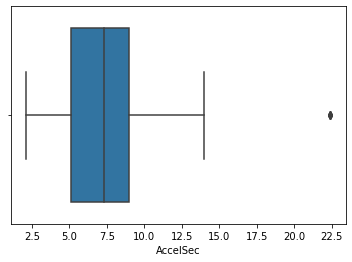

In [85]:
sns.boxplot(x=df['AccelSec'])

In [86]:
q1_AccelSec = df['AccelSec'].quantile(0.25)
q2_AccelSec = df['AccelSec'].quantile(0.50)
q3_AccelSec = df['AccelSec'].quantile(0.75)
median =  df['AccelSec'].median()
print("Q1 :",q1_AccelSec)
print("Q2 :",q2_AccelSec)
print("Q3 :",q3_AccelSec)
print("median :",median)

iqr = q3_AccelSec - q1_AccelSec

upper_tail = q3_AccelSec + 1.5*iqr
lower_tail = q1_AccelSec - 1.5*iqr
print("Upper Tail :",upper_tail)
print("Lower Tail :",lower_tail)

Q1 : 5.1
Q2 : 7.3
Q3 : 9.0
median : 7.3
Upper Tail : 14.850000000000001
Lower Tail : -0.7500000000000009


In [87]:
median_AccelSec= df.loc[(df['AccelSec'] <= upper_tail) & 
                            (df['AccelSec'] >= lower_tail),'AccelSec'].median()
median_AccelSec 

7.3

<AxesSubplot:xlabel='AccelSec'>

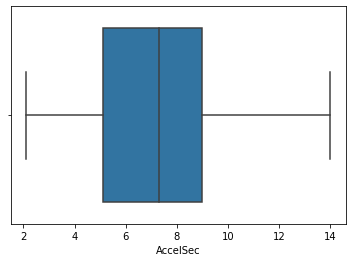

In [88]:
df.loc[(df['AccelSec'] > upper_tail) |
                            (df['AccelSec'] < lower_tail),'AccelSec'] = median_AccelSec
sns.boxplot(x=df['AccelSec'])

<AxesSubplot:xlabel='TopSpeed_KmH'>

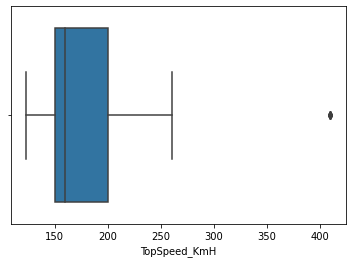

In [89]:
sns.boxplot(x=df['TopSpeed_KmH'])

In [90]:
q1_TopSpeed_KmH = df['TopSpeed_KmH'].quantile(0.25)
q2_TopSpeed_KmH = df['TopSpeed_KmH'].quantile(0.50)
q3_TopSpeed_KmH = df['TopSpeed_KmH'].quantile(0.75)
median =  df['TopSpeed_KmH'].median()
print("Q1 :",q1_TopSpeed_KmH)
print("Q2 :",q2_TopSpeed_KmH)
print("Q3 :",q3_TopSpeed_KmH)
print("median :",median)

iqr = q3_TopSpeed_KmH - q1_TopSpeed_KmH

upper_tail = q3_TopSpeed_KmH + 1.5*iqr
lower_tail = q1_TopSpeed_KmH - 1.5*iqr
print("Upper Tail :",upper_tail)
print("Lower Tail :",lower_tail)

Q1 : 150.0
Q2 : 160.0
Q3 : 200.0
median : 160.0
Upper Tail : 275.0
Lower Tail : 75.0


In [91]:
median_TopSpeed_KmH= df.loc[(df['TopSpeed_KmH'] <= upper_tail) & 
                            (df['TopSpeed_KmH'] >= lower_tail),'TopSpeed_KmH'].median()
median_TopSpeed_KmH

160.0

<AxesSubplot:xlabel='TopSpeed_KmH'>

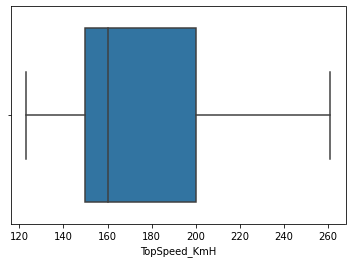

In [92]:
df.loc[(df['TopSpeed_KmH'] > upper_tail) |
                            (df['TopSpeed_KmH'] < lower_tail),'TopSpeed_KmH'] = median_TopSpeed_KmH
sns.boxplot(x=df['TopSpeed_KmH'])

<AxesSubplot:xlabel='Range_Km'>

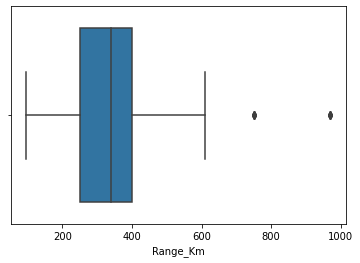

In [93]:
sns.boxplot(x=df['Range_Km'])

In [94]:
q1_Range_Km = df['Range_Km'].quantile(0.25)
q2_Range_Km = df['Range_Km'].quantile(0.50)
q3_Range_Km = df['Range_Km'].quantile(0.75)
median =  df['Range_Km'].median()
print("Q1 :",q1_Range_Km)
print("Q2 :",q2_Range_Km)
print("Q3 :",q3_Range_Km)
print("median :",median)

iqr = q3_Range_Km - q1_Range_Km

upper_tail = q3_Range_Km + 1.5*iqr
lower_tail = q1_Range_Km - 1.5*iqr
print("Upper Tail :",upper_tail)
print("Lower Tail :",lower_tail)

Q1 : 250.0
Q2 : 340.0
Q3 : 400.0
median : 340.0
Upper Tail : 625.0
Lower Tail : 25.0


In [95]:
median_Range_Km= df.loc[(df['Range_Km'] <= upper_tail) & 
                            (df['Range_Km'] >= lower_tail),'Range_Km'].median()
median_Range_Km

340.0

<AxesSubplot:xlabel='Range_Km'>

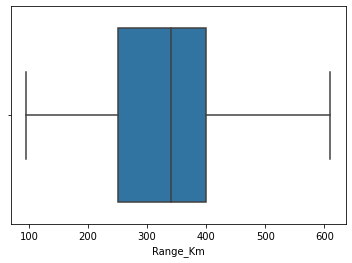

In [96]:
df.loc[(df['Range_Km'] > upper_tail) |
                            (df['Range_Km'] < lower_tail),'Range_Km'] = median_Range_Km
sns.boxplot(x=df['Range_Km'])

<AxesSubplot:xlabel='Efficiency_WhKm'>

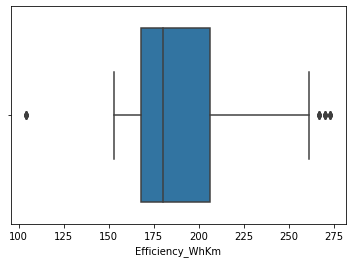

In [97]:
sns.boxplot(x=df['Efficiency_WhKm'])

In [98]:
q1_Efficiency_WhKm = df['Efficiency_WhKm'].quantile(0.25)
q2_Efficiency_WhKm = df['Efficiency_WhKm'].quantile(0.50)
q3_Efficiency_WhKm = df['Efficiency_WhKm'].quantile(0.75)
median =  df['Efficiency_WhKm'].median()
print("Q1 :",q1_Efficiency_WhKm)
print("Q2 :",q2_Efficiency_WhKm)
print("Q3 :",q3_Efficiency_WhKm)
print("median :",median)

iqr = q3_Efficiency_WhKm - q1_Efficiency_WhKm

upper_tail = q3_Efficiency_WhKm + 1.5*iqr
lower_tail = q1_Efficiency_WhKm - 1.5*iqr
print("Upper Tail :",upper_tail)
print("Lower Tail :",lower_tail)

Q1 : 168.0
Q2 : 180.0
Q3 : 206.0
median : 180.0
Upper Tail : 263.0
Lower Tail : 111.0


In [99]:
median_Efficiency_WhKm= df.loc[(df['Efficiency_WhKm'] <= upper_tail) & 
                            (df['Efficiency_WhKm'] >= lower_tail),'Efficiency_WhKm'].median()
median_Efficiency_WhKm

180.0

<AxesSubplot:xlabel='Efficiency_WhKm'>

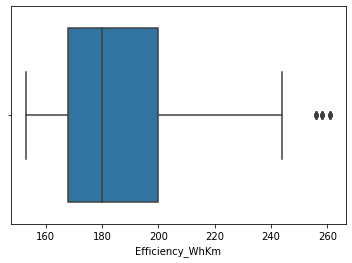

In [100]:
df.loc[(df['Efficiency_WhKm'] > upper_tail) |
                            (df['Efficiency_WhKm'] < lower_tail),'Efficiency_WhKm'] = median_Efficiency_WhKm
sns.boxplot(x=df['Efficiency_WhKm'])

<AxesSubplot:xlabel='PowerTrain'>

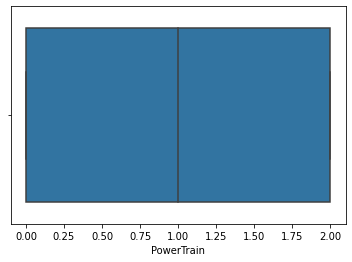

In [101]:
sns.boxplot(x=df['PowerTrain'])

# TRAIN TEST SPLIT

In [123]:
df = df.select_dtypes(exclude=object) 
x = df.drop('PriceEuro',axis = 1)
y = df['PriceEuro']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=25)

In [124]:
x_train

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,RapidCharge,PowerTrain,Seats,PlugType_Type 1 CHAdeMO,PlugType_Type 2,PlugType_Type 2 CCS,...,BodyStyle_Sedan,BodyStyle_Station,Segment_A,Segment_B,Segment_C,Segment_D,Segment_E,Segment_F,Segment_N,Segment_S
125,10.0,160,290,179,1,1,5,0,0,1,...,0,0,0,0,1,0,0,0,0,0
651,3.0,210,340,180,1,0,6,0,0,1,...,0,0,0,0,0,0,0,0,1,0
123,8.1,150,275,164,1,2,5,0,0,1,...,0,0,0,1,0,0,0,0,0,0
26,9.0,160,350,166,1,1,5,0,0,1,...,0,0,0,0,1,0,0,0,0,0
357,10.0,150,575,180,1,0,5,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,5.6,225,310,153,1,1,5,0,0,1,...,1,0,0,0,0,1,0,0,0,0
143,3.8,250,515,184,1,0,5,0,1,0,...,0,0,0,0,0,0,0,1,0,0
474,7.6,160,440,198,1,2,5,0,0,1,...,0,0,0,0,1,0,0,0,0,0
318,6.3,180,400,193,1,0,5,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [125]:
x_train.shape

(618, 28)

# MODEL TRAINING 

In [126]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [127]:
model.intercept_

81414.05875382278

# Model Evaluation

In [128]:
# Testing Data Evaluation
y_pred = model.predict(x_test)
y_pred[20:25]

array([55334.92250887, 70678.47736711, 37989.66769435, 18345.97078224,
       52881.85192312])

In [129]:
y_test[20:25]

233    60437
296    93800
815    37900
675    24790
100    50000
Name: PriceEuro, dtype: int64

In [130]:
mse = mean_squared_error(y_test, y_pred)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_test, y_pred)
print("MAE :",mae)

r2_test = r2_score(y_test, y_pred)
print('R1-Squared :',r2_test)

MSE : 74113684.04853411
RMSE : 8608.930482268637
MAE : 5812.013128606776
R1-Squared : 0.9165507477592196


In [131]:
# Training Data Evaluation

y_pred_train = model.predict(x_train)
mse = mean_squared_error(y_train, y_pred_train)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("MAE :",mae)

r2_train = r2_score(y_train, y_pred_train)
print('R2-Squared :',r2_train)

MSE : 84534423.74218245
RMSE : 9194.260369501315
MAE : 6055.586880415391
R2-Squared : 0.931744577552262


# Model Training with KNN 

In [132]:
knn_reg = KNeighborsRegressor(n_neighbors=3,p=2)
knn_reg.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=3)

# EVALUATION

In [133]:
# Testing Data Evaluation
y_pred = knn_reg.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_test,y_pred)
print("MAE :",mae)

r2_test = r2_score(y_test, y_pred)
print("R1-Squared :",r2_test)

MSE : 537210.2610571737
RMSE : 732.9462879755745
MAE : 187.0873786407767
R1-Squared : 0.9993951212227968


In [134]:
# Training Data Evaluation
y_pred_train = knn_reg.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("MAE :",mae)

r2_train = r2_score(y_train, y_pred_train)
print("R2-Squared :",r2_train)

MSE : 229932.04746494073
RMSE : 479.51230168259576
MAE : 84.35598705501619
R2-Squared : 0.9998143465308067


# Normalization

In [135]:
normal_scaler = MinMaxScaler()
normal_scaler.fit(x_train) ## We are storing Minimum and Maximum Values
array = normal_scaler.transform(x_train)
normal_train_xdf = pd.DataFrame(array,columns= x_train.columns)
normal_train_xdf.head(3)

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,RapidCharge,PowerTrain,Seats,PlugType_Type 1 CHAdeMO,PlugType_Type 2,PlugType_Type 2 CCS,...,BodyStyle_Sedan,BodyStyle_Station,Segment_A,Segment_B,Segment_C,Segment_D,Segment_E,Segment_F,Segment_N,Segment_S
0,0.663866,0.268116,0.378641,0.240741,1.0,0.5,0.6,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.075630,0.630435,0.475728,0.250000,1.0,0.0,0.8,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.504202,0.195652,0.349515,0.101852,1.0,1.0,0.6,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [136]:
knn_reg = KNeighborsRegressor(n_neighbors=5, p = 2)
knn_reg.fit(normal_train_xdf, y_train)

# Training Data Evaluation
y_pred_train = knn_reg.predict(normal_train_xdf)

mse = mean_squared_error(y_train, y_pred_train)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("MAE :",mae)

r2_train = r2_score(y_train, y_pred_train)
print("R2-Squared :",r2_train)

MSE : 650672.2014239484
RMSE : 806.6425487314368
MAE : 216.632362459547
R2-Squared : 0.9994746293401296


In [137]:
array = normal_scaler.transform(x_test)
normal_test_df = pd.DataFrame(array,columns= x_test.columns)

# Testing Data Evaluation
y_pred = knn_reg.predict(normal_test_df)

mse = mean_squared_error(y_test, y_pred)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_test,y_pred)
print("MAE :",mae)

r2_test = r2_score(y_test, y_pred)
print("R1-Squared :",r2_test)

MSE : 2146561.5005825255
RMSE : 1465.1148421139299
MAE : 661.8310679611652
R1-Squared : 0.9975830515725658


# Standardization

In [138]:
std_scaler = StandardScaler()
std_scaler.fit(x_train) ## We are storing mean and std Values
array = std_scaler.transform(x_train)
std_train_xdf = pd.DataFrame(array,columns= x_train.columns)
std_train_xdf.head(3)

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,RapidCharge,PowerTrain,Seats,PlugType_Type 1 CHAdeMO,PlugType_Type 2,PlugType_Type 2 CCS,...,BodyStyle_Sedan,BodyStyle_Station,Segment_A,Segment_B,Segment_C,Segment_D,Segment_E,Segment_F,Segment_N,Segment_S
0,1.040665,-0.461547,-0.366513,-0.337017,0.229806,0.069186,0.153978,-0.11452,-0.312556,0.382842,...,-0.336918,-0.099015,-0.270031,-0.513618,1.597412,-0.415542,-0.330931,-0.374461,-0.255963,-0.107036
1,-1.577185,0.870088,0.119132,-0.296354,0.229806,-1.086407,1.422758,-0.11452,-0.312556,0.382842,...,-0.336918,-0.099015,-0.270031,-0.513618,-0.626013,-0.415542,-0.330931,-0.374461,3.906809,-0.107036
2,0.330106,-0.727874,-0.512207,-0.946964,0.229806,1.224778,0.153978,-0.11452,-0.312556,0.382842,...,-0.336918,-0.099015,-0.270031,1.946971,-0.626013,-0.415542,-0.330931,-0.374461,-0.255963,-0.107036


In [139]:
knn_reg = KNeighborsRegressor(n_neighbors=5, p=2)
knn_reg.fit(std_train_xdf, y_train)

# Training Data Evaluation
y_pred_train = knn_reg.predict(std_train_xdf)

mse = mean_squared_error(y_train, y_pred_train)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("MAE :",mae)

r2_train = r2_score(y_train, y_pred_train)
print("R2-Squared :",r2_train)

MSE : 626196.0227831719
RMSE : 791.3254847300016
MAE : 214.34110032362466
R2-Squared : 0.9994943920810235


In [140]:
array = std_scaler.transform(x_test)
std_test_df = pd.DataFrame(array,columns= x_test.columns)

# Testing Data Evaluation
y_pred = knn_reg.predict(std_test_df)

mse = mean_squared_error(y_test, y_pred)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_test,y_pred)
print("MAE :",mae)

r2_test = r2_score(y_test, y_pred)
print("R1-Squared :",r2_test)

MSE : 2024180.6073786416
RMSE : 1422.7370127253462
MAE : 650.3747572815536
R1-Squared : 0.9977208479074469


# model Training with Decision Tree

In [141]:
dt_reg = DecisionTreeRegressor()
dt_reg.fit(x_train, y_train)

DecisionTreeRegressor()

In [142]:
# Testing Data Evaluation
y_pred = dt_reg.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE :",mse)
print('*'*80)

rmse = np.sqrt(mse)
print("RMSE :",rmse)
print('*'*80)

mae = mean_absolute_error(y_test, y_pred)
print("MAE :",mae)
print('*'*80)

r2_test = r2_score(y_test, y_pred)
print("R1-Squared :",r2_test)

MSE : 163280.7616508047
********************************************************************************
RMSE : 404.08014260886995
********************************************************************************
MAE : 83.45730644759772
********************************************************************************
R1-Squared : 0.9998161519341537


In [143]:
# Testing Data Evaluation
y_pred_train = dt_reg.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("MSE :",mse)
print('*'*80)

rmse = np.sqrt(mse)
print("RMSE :",rmse)
print('*'*80)

mae = mean_absolute_error(y_train, y_pred_train)
print("MAE :",mae)
print('*'*80)

r2_train = r2_score(y_train, y_pred_train)
print("R2-Squared :",r2_train)

MSE : 150568.20284623685
********************************************************************************
RMSE : 388.03118798137456
********************************************************************************
MAE : 80.31034768898847
********************************************************************************
R2-Squared : 0.9998784270852332


# hypertuning

In [144]:
dt_reg = DecisionTreeRegressor()

hyperparameters ={ "criterion" :['mse','mae'],
     'max_depth': np.arange(3,14),
     'min_samples_split' : np.arange(2,20),
     'min_samples_leaf':np.arange(2,15)}

gscv_dt_reg = GridSearchCV(dt_reg,hyperparameters, cv = 5)
gscv_dt_reg.fit(x_train, y_train)
gscv_dt_reg.best_estimator_

DecisionTreeRegressor(criterion='mae', max_depth=13, min_samples_leaf=2)

In [146]:
dt_reg = gscv_dt_reg.best_estimator_
dt_reg.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mae', max_depth=13, min_samples_leaf=2)

In [147]:
# Testing Data Evaluation
y_pred = dt_reg.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE :",mse)
print('*'*80)

rmse = np.sqrt(mse)
print("RMSE :",rmse)
print('*'*80)

mae = mean_absolute_error(y_test, y_pred)
print("MAE :",mae)
print('*'*80)

r2_test = r2_score(y_test, y_pred)
print("R1-Squared :",r2_test)

MSE : 267918.17961165047
********************************************************************************
RMSE : 517.6081332549272
********************************************************************************
MAE : 100.2621359223301
********************************************************************************
R1-Squared : 0.9996983340925859


In [148]:
# Testing Data Evaluation
y_pred_train = dt_reg.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("MSE :",mse)
print('*'*80)

rmse = np.sqrt(mse)
print("RMSE :",rmse)
print('*'*80)

mae = mean_absolute_error(y_train, y_pred_train)
print("MAE :",mae)
print('*'*80)

r2_train = r2_score(y_train, y_pred_train)
print("R2-Squared :",r2_train)

MSE : 190707.5647249191
********************************************************************************
RMSE : 436.70077252613044
********************************************************************************
MAE : 74.70873786407768
********************************************************************************
R2-Squared : 0.9998460174587104


# Pruning 

In [149]:
decision_tree_model = DecisionTreeRegressor(random_state=10)
decision_tree_model.fit(x_train, y_train)

DecisionTreeRegressor(random_state=10)

In [150]:
result = decision_tree_model.cost_complexity_pruning_path(x_train, y_train)
ccp_alpha_list = result['ccp_alphas']
ccp_alpha_list

array([0.00000000e+00, 1.51082898e+00, 5.10150044e+00, 2.25307443e+01,
       2.54231392e+01, 3.02912621e+01, 7.08404993e+01, 7.14886731e+01,
       9.20886233e+01, 1.34595967e+02, 2.12150717e+02, 5.88364078e+02,
       7.19889317e+02, 1.53154785e+03, 1.65645786e+03, 2.00955937e+03,
       3.29965852e+03, 3.57902913e+03, 4.23450336e+03, 4.48649879e+03,
       6.29737821e+03, 7.40656620e+03, 7.52774751e+03, 9.72513298e+03,
       9.75457270e+03, 1.18715894e+04, 1.26525243e+04, 1.34183194e+04,
       1.60144300e+04, 2.24138696e+04, 2.45752427e+04, 2.50590832e+04,
       2.75816417e+04, 2.78011257e+04, 3.16815915e+04, 3.59390869e+04,
       4.24090615e+04, 5.00739188e+04, 5.57850610e+04, 6.21359223e+04,
       7.91031904e+04, 7.92726466e+04, 8.56794139e+04, 8.57864495e+04,
       9.89681904e+04, 1.08542483e+05, 1.19018457e+05, 1.20922041e+05,
       1.26166410e+05, 1.30172293e+05, 1.51869177e+05, 1.66449040e+05,
       1.84466019e+05, 1.91045495e+05, 2.25798580e+05, 2.34951456e+05,
      

In [151]:
train_accuracy_list = []
test_accuracy_list = []
for ccp_alpha in ccp_alpha_list:
    dt_reg_model = DecisionTreeRegressor(random_state=10,ccp_alpha=ccp_alpha)
    dt_reg_model.fit(x_train, y_train)
    train_accuracy_list.append(dt_reg_model.score(x_train, y_train))
    test_accuracy_list.append(dt_reg_model.score(x_test, y_test))


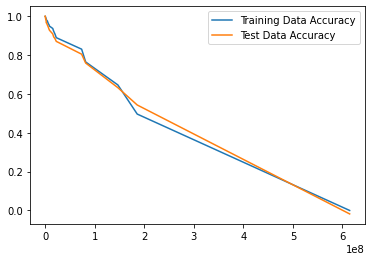

In [152]:
fig,ax = plt.subplots()
ax.plot(ccp_alpha_list, train_accuracy_list, label = "Training Data Accuracy")
ax.plot(ccp_alpha_list, test_accuracy_list, label = "Test Data Accuracy")
ax.legend()

In [153]:
decision_tree_model = DecisionTreeRegressor(random_state=10,ccp_alpha=ccp_alpha_list[50])
decision_tree_model.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=151869.17691477545, random_state=10)

In [154]:
# Testing Data Evaluation
y_pred = decision_tree_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE :",mse)
print('*'*80)

rmse = np.sqrt(mse)
print("RMSE :",rmse)
print('*'*80)

mae = mean_absolute_error(y_test, y_pred)
print("MAE :",mae)
print('*'*80)

r2_test = r2_score(y_test, y_pred)
print("R1-Squared :",r2_test)

MSE : 2747562.492482285
********************************************************************************
RMSE : 1657.5772960807242
********************************************************************************
MAE : 1263.0808872527575
********************************************************************************
R1-Squared : 0.9969063468045616


In [155]:
# Testing Data Evaluation
y_pred_train = decision_tree_model.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("MSE :",mse)
print('*'*80)

rmse = np.sqrt(mse)
print("RMSE :",rmse)
print('*'*80)

mae = mean_absolute_error(y_train, y_pred_train)
print("MAE :",mae)
print('*'*80)

r2_train = r2_score(y_train, y_pred_train)
print("R2-Squared :",r2_train)

MSE : 2066618.587640986
********************************************************************************
RMSE : 1437.5738546735558
********************************************************************************
MAE : 1066.0205157689827
********************************************************************************
R2-Squared : 0.99833135522201


# Model Training with Random Forest 

In [156]:
rf_reg = RandomForestRegressor()
rf_reg.fit(x_train, y_train)

RandomForestRegressor()

In [157]:
## Training Data Evaluation 

y_pred_train = rf_reg.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("MSE : ",mse)

print("*"*80)
rmse = np.sqrt(mse)
print("RMSE :",rmse)

print("*"*80)
mae = mean_absolute_error(y_train, y_pred_train)
print("MAE  :",mae)
print("*"*80)

r2_train = r2_score(y_train, y_pred_train)
print("R2-squared :",r2_train)

MSE :  172697.3960347545
********************************************************************************
RMSE : 415.5687621017182
********************************************************************************
MAE  : 113.89541931834086
********************************************************************************
R2-squared : 0.9998605593650473


In [158]:
## Testing Data Evaluation

y_pred = rf_reg.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE : ",mse)

print("*"*80)
rmse = np.sqrt(mse)
print("RMSE :",rmse)

print("*"*80)
mae = mean_absolute_error(y_test, y_pred)
print("MAE  :",mae)
print("*"*80)

r2_test = r2_score(y_test, y_pred)
print("R1-squared :",r2_test)

MSE :  248025.0265720932
********************************************************************************
RMSE : 498.02111056871195
********************************************************************************
MAE  : 193.33804874151707
********************************************************************************
R1-squared : 0.9997207330431599


# hypertuning 

In [159]:
rf_reg = RandomForestRegressor()

hyperparameters = {
                "n_estimators" :np.arange(90,120),
                "criterion" : ['mse','mae'],
                "max_depth" : np.arange(3, 8),
                "min_samples_split" : np.arange(10,15), 
                "min_samples_leaf" : np.arange(3,8),
                "random_state" : [11]
                    }

rscv_rf_reg = RandomizedSearchCV(rf_reg,hyperparameters,cv = 5)
rscv_rf_reg.fit(x_train, y_train)
rscv_rf_reg.best_estimator_

RandomForestRegressor(criterion='mse', max_depth=4, min_samples_leaf=3,
                      min_samples_split=14, n_estimators=119, random_state=11)

In [160]:
rf_reg = rscv_rf_reg.best_estimator_
rf_reg.fit(x_train, y_train)

RandomForestRegressor(criterion='mse', max_depth=4, min_samples_leaf=3,
                      min_samples_split=14, n_estimators=119, random_state=11)

In [163]:
## Training Data Evaluation 

y_pred_train = rf_reg.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("MSE : ",mse)

print("*"*80)
rmse = np.sqrt(mse)
print("RMSE :",rmse)

print("*"*80)
mae = mean_absolute_error(y_train, y_pred_train)
print("MAE  :",mae)
print("*"*80)

r2_train = r2_score(y_train, y_pred_train)
print("R2-squared :",r2_train)

MSE :  28251255.137576275
********************************************************************************
RMSE : 5315.190978466933
********************************************************************************
MAE  : 3785.15022189437
********************************************************************************
R2-squared : 0.9771891583483774


In [164]:
## Testing Data Evaluation

y_pred = rf_reg.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE : ",mse)

print("*"*80)
rmse = np.sqrt(mse)
print("RMSE :",rmse)

print("*"*80)
mae = mean_absolute_error(y_test, y_pred)
print("MAE  :",mae)
print("*"*80)

r2_test = r2_score(y_test, y_pred)
print("R1-squared :",r2_test)

MSE :  36815744.41320602
********************************************************************************
RMSE : 6067.597911299497
********************************************************************************
MAE  : 4466.5093447896015
********************************************************************************
R1-squared : 0.958546840824188


# Result 

In [ ]:
We can see the Linear Regression, gives the best result for our model with accuracy 0.91 and 0.93 r2 values.

# Testing on Single Row

In [167]:
model.n_features_in_

28

In [168]:
x.head(1).T

,0
AccelSec,4.6
TopSpeed_KmH,233.0
Range_Km,450.0
Efficiency_WhKm,161.0
RapidCharge,1.0
PowerTrain,0.0
Seats,5.0
PlugType_Type 1 CHAdeMO,0.0
PlugType_Type 2,0.0
PlugType_Type 2 CCS,1.0


In [169]:
AccelSec=4.6
TopSpeed_KmH=233.0
Range_Km=450.0
Efficiency_WhKm=161.0
FastCharge_KmH=940.0
RapidCharge=1.0
PowerTrain=0.0
Seats=5.0
PlugType='Type 2 CCS'
BodyStyle='Sedan'
Segment='D'

In [170]:
column_names = x.columns
column_names

Index(['AccelSec', 'TopSpeed_KmH', 'Range_Km', 'Efficiency_WhKm',
       'RapidCharge', 'PowerTrain', 'Seats', 'PlugType_Type 1 CHAdeMO',
       'PlugType_Type 2', 'PlugType_Type 2 CCS', 'PlugType_Type 2 CHAdeMO',
       'BodyStyle_Cabrio', 'BodyStyle_Hatchback', 'BodyStyle_Liftback',
       'BodyStyle_MPV', 'BodyStyle_Pickup', 'BodyStyle_SPV', 'BodyStyle_SUV',
       'BodyStyle_Sedan', 'BodyStyle_Station', 'Segment_A', 'Segment_B',
       'Segment_C', 'Segment_D', 'Segment_E', 'Segment_F', 'Segment_N',
       'Segment_S'],
      dtype='object')

In [171]:
lable_encodded_columns={'RapidCharge':RapidCharge_values,
                       'PowerTrain':PowerTrain_values,
                        'columns':list(x.columns),
                       }
lable_encodded_columns

{'RapidCharge': {'YES': 1, 'NO': 0},
 'PowerTrain': {'AWD': 0, 'RWD': 1, 'FWD': 2},
 'columns': ['AccelSec',
  'TopSpeed_KmH',
  'Range_Km',
  'Efficiency_WhKm',
  'RapidCharge',
  'PowerTrain',
  'Seats',
  'PlugType_Type 1 CHAdeMO',
  'PlugType_Type 2',
  'PlugType_Type 2 CCS',
  'PlugType_Type 2 CHAdeMO',
  'BodyStyle_Cabrio',
  'BodyStyle_Hatchback',
  'BodyStyle_Liftback',
  'BodyStyle_MPV',
  'BodyStyle_Pickup',
  'BodyStyle_SPV',
  'BodyStyle_SUV',
  'BodyStyle_Sedan',
  'BodyStyle_Station',
  'Segment_A',
  'Segment_B',
  'Segment_C',
  'Segment_D',
  'Segment_E',
  'Segment_F',
  'Segment_N',
  'Segment_S']}

In [172]:
import json
with open("Label_Encoded_columns.json",'w') as f:
    json.dump(lable_encodded_columns,f)

In [173]:
test_array=np.zeros(len(x.columns),dtype=int)
# array

In [174]:
test_array[1]==AccelSec
test_array

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [175]:
test_array = np.zeros(x.shape[1])                                          
test_array[0] = AccelSec
test_array[1] = TopSpeed_KmH                                                         
test_array[2] = Range_Km
test_array[3] = Efficiency_WhKm
test_array[4] = FastCharge_KmH
test_array[5] = RapidCharge
test_array[6] = PowerTrain
test_array[7] = Seats


# test_array[PlugType_index] = 1
# test_array[BodyStyle_index] = 2
# test_array[Segment_index] = 3

PlugType_index = np.where(column_names == PlugType)[0]
BodyStyle_index = np.where(column_names == BodyStyle)[0]
Segment_index = np.where(column_names == Segment)[0]

In [176]:
test_array

array([  4.6, 233. , 450. , 161. , 940. ,   1. ,   0. ,   5. ,   0. ,
         0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
         0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
         0. ])

In [177]:
PlugType =  'PlugType_' + PlugType
PlugType_index = np.where(column_names == PlugType)[0][0]

In [178]:
BodyStyle =  'BodyStyle_' + BodyStyle
BodyStyle_index = np.where(column_names == BodyStyle)[0][0]

In [179]:
Segment =  'Segment_' + Segment
Segment_index = np.where(column_names == Segment)[0][0]

In [180]:
model.predict([test_array])

array([-43096255.50594356])

In [181]:
with open('Linear_Model.pkl','wb') as f:
    pickle.dump(model,f)